In [202]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scikitplot as skplt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
%config InlineBackend.figure_format = 'png' 


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [222]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [223]:
data = load_digits()

In [224]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [225]:
df = pd.DataFrame(data['data'])
Y = pd.Series(data['target'])

In [247]:
Y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.2)

In [256]:
from sklearn.model_selection import GridSearchCV

In [259]:
depths = np.arange(1,20)
features_num = np.arange(3,63)
grid = {'max_depth': depths, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [268]:
%%time
gridsearch.fit(df, Y)

CPU times: user 1min 12s, sys: 842 ms, total: 1min 13s
Wall time: 1min 15s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [344]:
bestmd=gridsearch.best_params_['max_depth']
bestfeat=gridsearch.best_params_['max_features']
gridsearch.best_params_

{'max_depth': 19, 'max_features': 35}

In [289]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=bestmd, max_features=bestfeat)

In [290]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=35, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [291]:
predictions = model.predict_proba(X_test)

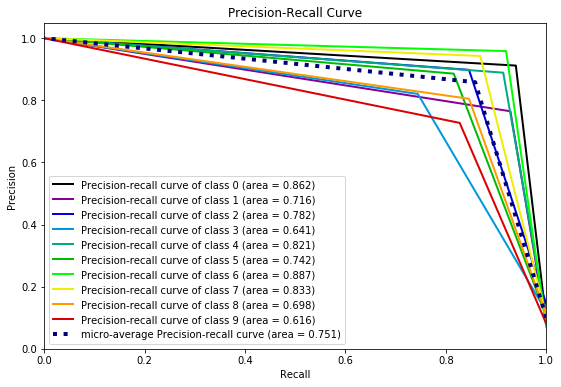

In [341]:
skplt.metrics.plot_precision_recall_curve(Y_test, predictions)
plt.show()

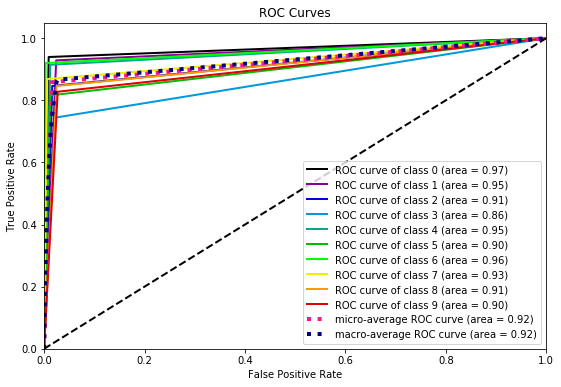

In [342]:
skplt.metrics.plot_roc_curve(Y_test, predictions)
plt.show()